In [54]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [55]:
IMBD_df = pd.read_csv('/Volumes/Developer/Tech_Saksham/Unit4(DataAnalysis)/Data/imdb.csv')
IMBD_df.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate


In [56]:
IMBD_df.columns

Index(['Name', 'Date', 'Rate', 'Votes', 'Genre', 'Duration', 'Type',
       'Certificate', 'Episodes', 'Nudity', 'Violence', 'Profanity', 'Alcohol',
       'Frightening'],
      dtype='object')

In [57]:
IMBD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         6178 non-null   object 
 3   Votes        6178 non-null   object 
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  5728 non-null   object 
 8   Episodes     6178 non-null   object 
 9   Nudity       4719 non-null   object 
 10  Violence     5504 non-null   object 
 11  Profanity    5520 non-null   object 
 12  Alcohol      5407 non-null   object 
 13  Frightening  5320 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 675.8+ KB


In [58]:
IMBD_df.describe(include='object')
# IMBD_df.isnull().sum()

,Name,Rate,Votes,Genre,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,6178,6178,6178,6178,6178,5728,6178,4719,5504,5520,5407,5320
unique,4820,77,4802,377,2,22,284,4,4,4,4,4
top,King Kong,7.3,No Votes,Comedy,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,5,273,185,268,4446,1885,4446,2292,1814,2077,3257,1969


In [59]:
kingKongData = IMBD_df.loc[IMBD_df.Name=="King Kong"]
# print(kingKongData)

IMBD_df = IMBD_df.drop_duplicates()
kingKongData = IMBD_df.loc[IMBD_df.Name=="King Kong"]
print(kingKongData)


           Name  Date Rate    Votes                      Genre  Duration  \
2084  King Kong  2005  7.2  407,876   Action, Adventure, Drama     187.0   
4207  King Kong  1976  5.9   31,536          Adventure, Horror     134.0   
4951  King Kong  1933  7.9   82,705  Adventure, Horror, Sci-Fi     100.0   

      Type Certificate Episodes Nudity  Violence Profanity Alcohol Frightening  
2084  Film       PG-13        -   Mild  Moderate      Mild    Mild    Moderate  
4207  Film          PG        -   Mild  Moderate      Mild    Mild    Moderate  
4951  Film      Passed        -   Mild  Moderate       NaN    Mild    Moderate  


In [60]:
IMBD_df.shape

(5028, 14)

In [61]:
IMBD_df.all()

Name           True
Date           True
Rate           True
Votes          True
Genre          True
Duration       True
Type           True
Certificate    True
Episodes       True
Nudity         True
Violence       True
Profanity      True
Alcohol        True
Frightening    True
dtype: bool

In [62]:
IMBD_df.isnull().sum()

Name              0
Date              0
Rate              0
Votes             0
Genre             0
Duration        248
Type              0
Certificate     344
Episodes          0
Nudity         1182
Violence        531
Profanity       524
Alcohol         614
Frightening     670
dtype: int64

In [63]:
for i in range(0, IMBD_df.shape[0]):
    IMBD_df['Votes'][i] = IMBD_df['Votes'][i].replace(',', '')
    
IMBD_df['Votes']

0       107163
1        64375
2        27145
3        30443
4        84636
         ...  
5023     37492
5024    150448
5025    100668
5026       887
5027    203578
Name: Votes, Length: 5028, dtype: object

In [64]:
pd.to_numeric(IMBD_df.Rate, errors='coerce') 

0       7.6
1       6.3
2       6.4
3       6.4
4       8.3
       ... 
5023    3.8
5024    8.3
5025    7.3
5026    6.0
5027    6.3
Name: Rate, Length: 5028, dtype: float64

In [65]:
IMBD_df['Rate'] = pd.to_numeric(IMBD_df['Rate'], errors='coerce',  downcast='integer')
IMBD_df['Votes'] = pd.to_numeric(IMBD_df['Votes'], errors='coerce', downcast='integer')
IMBD_df['Duration'] = pd.to_numeric(IMBD_df['Duration'], errors='coerce', downcast='integer')

In [66]:
IMBD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, 0 to 5027
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5028 non-null   object 
 1   Date         5028 non-null   int64  
 2   Rate         4875 non-null   float64
 3   Votes        4875 non-null   float64
 4   Genre        5028 non-null   object 
 5   Duration     4780 non-null   float64
 6   Type         5028 non-null   object 
 7   Certificate  4684 non-null   object 
 8   Episodes     5028 non-null   object 
 9   Nudity       3846 non-null   object 
 10  Violence     4497 non-null   object 
 11  Profanity    4504 non-null   object 
 12  Alcohol      4414 non-null   object 
 13  Frightening  4358 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 718.3+ KB


In [67]:
IMBD_df.isna().sum()

Name              0
Date              0
Rate            153
Votes           153
Genre             0
Duration        248
Type              0
Certificate     344
Episodes          0
Nudity         1182
Violence        531
Profanity       524
Alcohol         614
Frightening     670
dtype: int64

In [68]:
IMBD_df['Rate'] = IMBD_df['Rate'].replace(np.nan, 0)
IMBD_df['Votes'] = IMBD_df['Votes'].replace(np.nan, 0)
IMBD_df['Duration'] = IMBD_df['Duration'].replace(np.nan, 0)

In [69]:
IMBD_df.Certificate.unique()

array(['PG-13', 'R', 'TV-MA', nan, 'TV-14', 'TV-PG', 'PG', 'TV-G',
       '(Banned)', 'Not Rated', 'E', 'NC-17', 'TV-Y7-FV', 'TV-Y7',
       'Unrated', 'Approved', 'G', 'TV-Y', 'GP', 'Passed', 'M', 'X',
       'M/PG'], dtype=object)

In [70]:
IMBD_df.loc[IMBD_df.Certificate.isna()]

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
7,House of the Dragon,2021,0.0,0.0,"Action, Adventure, Drama",0.0,Series,NaN,10,No Rate,No Rate,No Rate,No Rate,No Rate
32,Wolf,2021,4.1,229.0,"Drama, Mystery, Thriller",98.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
81,V/H/S/94,2021,5.5,3196.0,"Horror, Mystery, Thriller",103.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
88,Ridley Road,2021,6.6,704.0,Thriller,0.0,Series,NaN,4,No Rate,No Rate,No Rate,No Rate,No Rate
90,Spider-Man: No Way Home,2021,0.0,0.0,"Action, Adventure, Sci-Fi",0.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,SAS Australia,1959,7.5,141.0,Reality-TV,0.0,Series,NaN,25,No Rate,No Rate,No Rate,No Rate,No Rate
4974,A House on the Bayou,2021,0.0,0.0,"Horror, Thriller",0.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4986,Night Raiders,2021,6.4,118.0,Sci-Fi,97.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4991,The Forgiven,2021,6.8,62.0,Drama,117.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate


EXPLORATORY ANALYSIS AND VISUALIZATION

In [71]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [72]:
np.sort(IMBD_df['Date'].unique())

array([1922, 1927, 1931, 1932, 1933, 1935, 1937, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023])

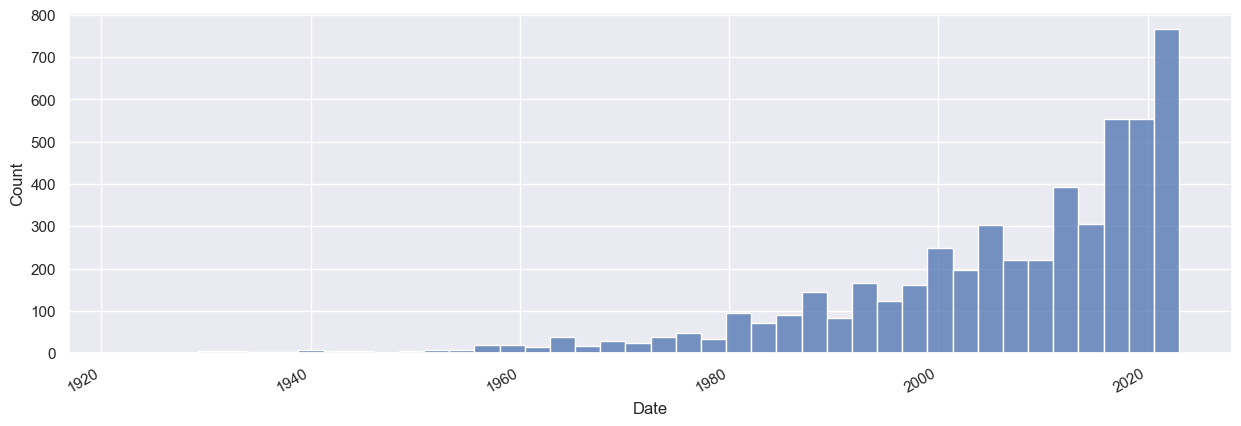

In [ ]:
fig = plt.figure(figsize=(15, 5))
# sns.set(style='dark')
sns.countplot(x='Date', data=IMBD_df)
fig.autofmt_xdate()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.9'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.7'),
  Text(8, 0, '2.8'),
  Text(9, 0, '2.9'),
  Text(10, 0, '3.0'),
  Text(11, 0, '3.1'),
  Text(12, 0, '3.2'),
  Text(13, 0, '3.3'),
  Text(14, 0, '3.4'),
  Text(15, 0, '3.5'),
  Text(16, 0, '3.7'),
  Text(17, 0, '3.8'),
  Text(18, 0, '3.9'),
  Text(19, 0, '4.0'),
  Text(20, 0, '4.1'),
  Text(21, 0, '4.2'),
  Text(22, 0, '4.3'),
  Text(23, 0, '4.4'),
  Text(24, 0, '4.5'),
  Text(

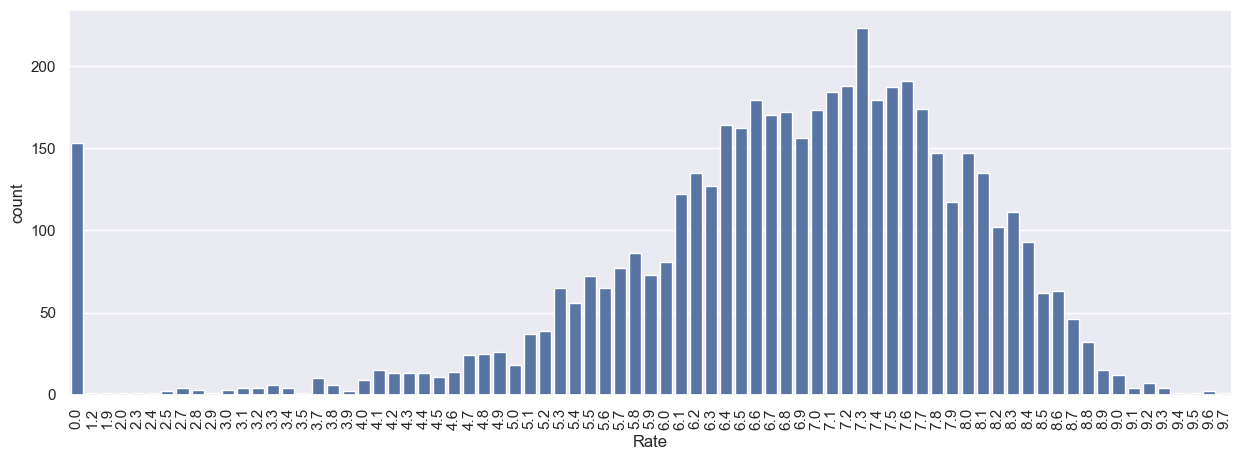

In [79]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(x='Rate', data=IMBD_df)
plt.xticks(rotation=90)

In [ ]:
# create a barchart for Rate x = 0, 4, 6, 8, 10  & y = Date
# which movie have highest vote
# which movie have lowest vote don't count 0
# which film have max durartion and which series have max duration
# Find all movie which is in category of action, drama, adventure and compare them using countplot